# K Nearest Neighbors Exercises

## Data Set and Problem
### The dataset has telecom data having columns as follows:
#### Features

    'state' - State where s/he lives
    'account_length' - Number of active days of Usage
    'intl_plan' - International Plan
    'area code' - Residence Area code
    'voice_mail_plan' - Whether the person has a voicemailbox setup
    'phone number' - The phone number alloted by the company
    'number_vmail_messages' - The number of voice mails recieved
    'total_day_minutes' - Total number of minutes of active usage at day time
    'total_day_calls', - Total number of calls made per minute at day time
    'total_day_charge' - Total Spending per day at day time(usually till 5 p.m.)
    'total_eve_minutes' - Total number of minutes of active usage at evening
    'total_eve_calls' - Total number of calls made per minute at evening 
    'total_eve_charge' - Total number of minutes of active usage at evening
    'total_night_minutes'- Total number of minutes of active usage at night
    'total_night_calls' - otal number of calls made per minute at night
    'total_night_charge' - Total number of minutes of active usage at night 
    'total_intl_minutes - Total number of minutes of active usage at night
    'total_intl_calls' - Total number of international calls made
    'total_intl_charge' - Total charges for international calls
    'number_customer_service_calls': Number of calls to the customer care
    
 #### The target variable
     'churned'



Lessons learned: Always use a data_path variable to make the code reusable

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
data_path = ['data']

In [2]:
# Import the data using the file path
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
df = pd.read_csv(filepath)
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Feature Engineering
At this stage you need to feature engineering which requires domain knowlege of the data as well. To avoid a highly complex model based on features which actually do not contribute to the prediction need to be dropped. You can also generate a correlation matrix to find there exist some relation between the target and feature.

In [3]:
corr = df.corr()

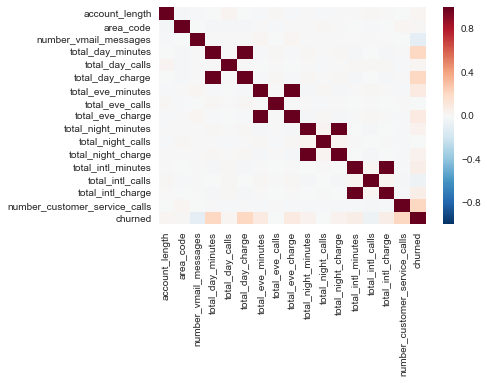

In [4]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

So, from the correlation heat map we observe that there a lot of variable which show a correlation of 1 which introduce redundancy and strong bias in the model. We need to remove those features.
Features like state, area code and phone number should not be influencing the churn rate thinking from a domain expert point of view. Phone number is given by the telecom company so it surely not a resaon to churn.
As compared to the other features state and area code play a very trivial role.
One of the best indicator of the churn rate is the number of calls the customer makes to customer care. 

In [5]:
#check if the data has been loaded correctly
df = df.drop(['state', 'area_code', 'phone_number', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes' ], axis=1)
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,84,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


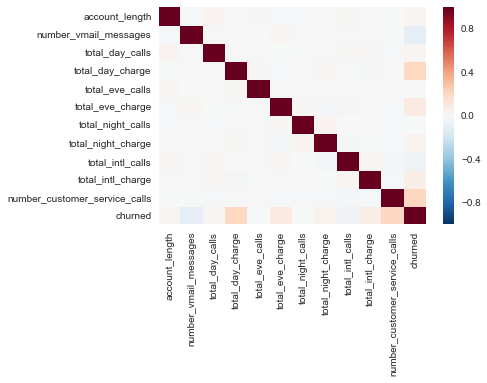

In [6]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Data Preprocessing
Some of the columns are categorical data and some are floats. These features will need to be numerically for a classification problem.

In [7]:
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
#Pass the data as Dataframe and 
#col will be the names of columns that need to converted into Binary
def preprocessing_data(dataframe, col):
    lb = LabelBinarizer()
    for column in col:
        dataframe[column] = lb.fit_transform(dataframe[column])
    """
    Scaler always return an np array.
    If you do not convert it into a 
    dataframe and try to fit in your 
    model it will return bad input error!!
    
    """
    msc = MinMaxScaler()
    #remember that a scaler returns tuple and you need to convert it back to a dataframe for further processing
    df = pd.DataFrame(msc.fit_transform(dataframe), columns=dataframe.columns)
    return df


In [8]:
col = ['intl_plan', 'voice_mail_plan', 'churned']
data_prep = preprocessing_data(df, col)
data_prep.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.666667,0.754183,0.582353,0.542866,0.520000,0.619584,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.745455,0.459672,0.605882,0.537690,0.588571,0.644344,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.690909,0.692436,0.647059,0.333225,0.594286,0.411930,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.430303,0.851740,0.517647,0.170171,0.508571,0.498593,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.684848,0.474230,0.717647,0.407959,0.691429,0.473270,0.15,0.505556,0.333333,0.0


We see that we get a scaled data where all the values lie between 0-1. It is nescessary to scale the data so that we do not get baised results based on the data that spread out or has higher variance. 

### Data Segregation

This section first divides the data into labels and target. Then Both the dataframe are divided into test and train data with train data taking a larger chunk

In [9]:
from sklearn.model_selection import train_test_split as tts
def segregation(dataframe):
    # Get a list of all the columns that don't contain the label
    x_cols = [x for x in dataframe.columns if x != 'churned']
    # Split the data into two dataframes
    X_data = dataframe[x_cols]
    Y_data = dataframe['churned']
    # Alternatively, the one I have been using in my previous modules:
    #target = 'churndep'
    # X_data = data.drop(target,1)
    # y_data = data[target]
    X_train, X_test, Y_train, Y_test = \
    tts(X_data, Y_data, test_size = 0.2, random_state=42)
    return X_train, X_test, Y_train, Y_test
    

In [10]:
X_train, X_test, Y_train, Y_test = segregation(data_prep)

### Building the model and calculating accuracy
#### At this stage we need to make a decision of which model will fit our data best and make accurate predictions. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def KNneighbourClf(X_train, X_test, Y_train, Y_test, neighbour):
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn = knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    acc_knn = accuracy_score(y_pred, Y_test)
    return acc_knn

Now lets run the algorithm for different values of k and see accuracy

In [12]:
run = 1
if run == 1:
    acc = dict()
    for neighbour in range(1, 20):
        acc[neighbour] = KNneighbourClf(X_train, X_test, Y_train, Y_test, neighbour)

### Plotting the accuracy and see it vary with change in data

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

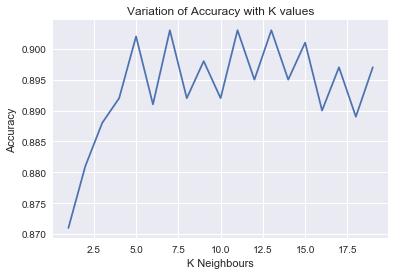

In [14]:
acc2 = pd.Series(acc, name = 'accuracy')
plt.title('Variation of Accuracy with K values')
sns.set()
sns.plt.plot(acc2.index, acc2[:])
plt.ylabel('Accuracy')
plt.xlabel('K Neighbours')